## Car Accident Severity Predictor

#### This is a notebook was created to complete the Applied Data Science Capstone

#### Import required libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading and understanding the data

In [3]:
df = pd.read_csv("datasets/Data-Collisions.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [6]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

# Data preprocessing 

Out of the 37 independent features, the ones that would be of interest in this study are the following:
“WEATHER”: A description of the weather conditions during the time of the collision.
“ROADCOND”: The condition of the road during the collision. 
“LIGHTCOND”: The light conditions during the collision.
These attributes were selected because they directly affect the severity of road accidents and they also had a large number of entries that can make a reasonable dataset unlike the other independent features.

In [38]:
cas_df = df[["SEVERITYCODE","WEATHER", "ROADCOND", "LIGHTCOND"]]
cas_df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


###### Drop null entries 

In [41]:
print(cas_df.info())
print("----------------------------------------")
cas_df.dropna(subset = ["WEATHER", "ROADCOND", "LIGHTCOND"], inplace=True)
print(cas_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189337 entries, 0 to 194672
Data columns (total 4 columns):
SEVERITYCODE    189337 non-null int64
WEATHER         189337 non-null object
ROADCOND        189337 non-null object
LIGHTCOND       189337 non-null object
dtypes: int64(1), object(3)
memory usage: 7.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 189337 entries, 0 to 194672
Data columns (total 4 columns):
SEVERITYCODE    189337 non-null int64
WEATHER         189337 non-null object
ROADCOND        189337 non-null object
LIGHTCOND       189337 non-null object
dtypes: int64(1), object(3)
memory usage: 7.2+ MB
None


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


###### Label encoding

In [42]:
cas_df.loc[:,('WEATHER')] = cas_df["WEATHER"].astype('str')
cas_df.loc[:,('ROADCOND')] = cas_df["ROADCOND"].astype('str')
cas_df.loc[:,('LIGHTCOND')] = cas_df["LIGHTCOND"].astype('str')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cas_df.loc[:,('WEATHER_CODES')] = le.fit_transform(cas_df["WEATHER"])
cas_df.loc[:,('ROADCOND_CODES')]= le.fit_transform(cas_df["ROADCOND"])
cas_df.loc[:,('LIGHTCOND_CODES')]= le.fit_transform(cas_df["LIGHTCOND"])
cas_df.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CODES,ROADCOND_CODES,LIGHTCOND_CODES
0,2,Overcast,Wet,Daylight,4,8,5
1,1,Raining,Wet,Dark - Street Lights On,6,8,2
2,1,Overcast,Dry,Daylight,4,0,5
3,1,Clear,Dry,Daylight,1,0,5
4,2,Raining,Wet,Daylight,6,8,5


In [44]:
cas_df.dtypes

SEVERITYCODE        int64
WEATHER            object
ROADCOND           object
LIGHTCOND          object
WEATHER_CODES       int64
ROADCOND_CODES      int64
LIGHTCOND_CODES     int64
dtype: object

In [45]:
target_count = cas_df["SEVERITYCODE"].value_counts()
target_count

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

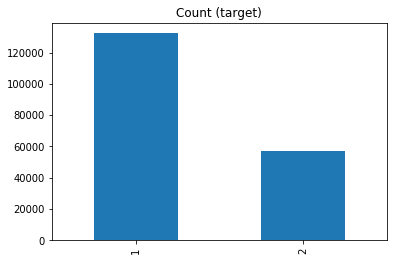

In [46]:
target_count.plot(kind='bar', title='Count (target)');

From the count of values above we see that the dataset is unbalanced and this can affect how our model works. 

###### Balancing dataset

To balance the dataset we would be downsampling the majority class which is entries with their severity code equal to 1

In [56]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = cas_df[cas_df.SEVERITYCODE==1]
df_minority = cas_df[cas_df.SEVERITYCODE== 2]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=57052,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
cas_df_balanced = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
cas_df_balanced["SEVERITYCODE"].value_counts()

2    57052
1    57052
Name: SEVERITYCODE, dtype: int64

In [59]:
cas_df_balanced.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CODES,ROADCOND_CODES,LIGHTCOND_CODES
82770,1,Clear,Dry,Daylight,1,0,5
122946,1,Clear,Dry,Daylight,1,0,5
102968,1,Clear,Dry,Daylight,1,0,5
13906,1,Overcast,Dry,Daylight,4,0,5
123301,1,Raining,Wet,Dark - Street Lights On,6,8,2


In [60]:
cas_df_balanced.tail()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CODES,ROADCOND_CODES,LIGHTCOND_CODES
194663,2,Raining,Wet,Daylight,6,8,5
194666,2,Clear,Wet,Daylight,1,8,5
194668,2,Clear,Dry,Daylight,1,0,5
194670,2,Clear,Dry,Daylight,1,0,5
194671,2,Clear,Dry,Dusk,1,0,6


From the results above we can see that the dataframe has all entries with severity codes equal to 1 preceding the entries equal to 2. So we need to shuffle the dataset randomly

In [61]:
cas_df_balanced = cas_df_balanced.sample(frac=1).reset_index(drop=True)
cas_df_balanced.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CODES,ROADCOND_CODES,LIGHTCOND_CODES
0,2,Clear,Dry,Daylight,1,0,5
1,1,Overcast,Wet,Daylight,4,8,5
2,1,Clear,Dry,Daylight,1,0,5
3,2,Clear,Dry,Daylight,1,0,5
4,2,Overcast,Dry,Daylight,4,0,5


###### Feature set

In [62]:
X = cas_df_balanced[["WEATHER_CODES","ROADCOND_CODES", "LIGHTCOND_CODES"]].values
X[0:5]

array([[1, 0, 5],
       [4, 8, 5],
       [1, 0, 5],
       [1, 0, 5],
       [4, 0, 5]])

In [63]:
y = cas_df_balanced["SEVERITYCODE"].values
y[0:5]

array([2, 1, 1, 2, 2])

###### Normalize the feature vector

In [64]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X[0:5]

array([[-0.71907961, -0.69272349,  0.39316776],
       [ 0.39080216,  1.5045195 ,  0.39316776],
       [-0.71907961, -0.69272349,  0.39316776],
       [-0.71907961, -0.69272349,  0.39316776],
       [ 0.39080216, -0.69272349,  0.39316776]])

###### Split data into training and test sets

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (85578, 3) (85578,)
Test set: (28526, 3) (28526,)


## K-Nearest Neighbours Model

Before we pick our K-Nearest Neighbours model we need to determine the best value for k that makes our model perform best

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.52657225, 0.52019211, 0.54287317, 0.51798359, 0.54287317,
       0.51700203, 0.54080488, 0.54087499, 0.54578279, 0.54511674,
       0.54466101, 0.51970133, 0.51970133, 0.52022716, 0.54515179,
       0.51970133, 0.54630863, 0.52113861, 0.54606324])

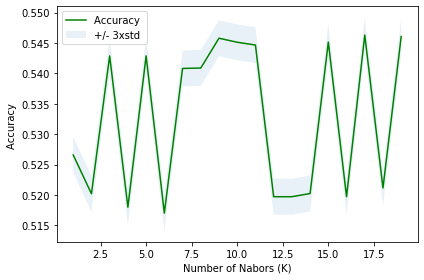

In [76]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [77]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5463086307228493 with k= 17


##### Build actual model

In [79]:
k = 17
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_knn = knn.predict(X_test)
yhat_knn[0:5]

array([2, 1, 1, 1, 2])

In [80]:
print("Train set Accuracy: ", accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat_knn))

Train set Accuracy:  0.5516020472551356
Test set Accuracy:  0.5463086307228493


## Support Vector Machine Model

In [85]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
yhat_svm = clf.predict(X_test)
yhat_svm[0:5]

array([2, 1, 1, 1, 2])

In [87]:
print (yhat_svm [0:5])
print (y_test [0:5])

[2 1 1 1 2]
[2 1 1 1 1]


In [88]:
print("Train set Accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat_svm))

Train set Accuracy:  0.5613825983313468
Test set Accuracy:  0.5567552408329244


## Decision Tree Model

In [91]:
from sklearn import tree

tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 10)
tree = tree.fit(X_train, y_train)
yhat_dt = tree.predict(X_test)
yhat_dt[0:5]

array([2, 1, 1, 1, 2])

In [92]:
print("Train set Accuracy: ", accuracy_score(y_train, tree.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat_dt))

Train set Accuracy:  0.5630419032929024
Test set Accuracy:  0.5550725653789526


# Evaluation

Evaluation is an important step that is used to determine model that best solves the given data science problem. Since this is a classification problem we would use the Jaccard similarity score and F1 score as the two metrics in determining the best model. 

In [102]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

### K Nearest Neighbour

In [94]:
jaccard_similarity_score(y_test, yhat_knn)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5463086307228493

In [97]:
f1_score(y_test, yhat_knn, average='weighted')

0.5167692804205527

### Support Vector Machine

In [103]:
jaccard_similarity_score(y_test, yhat_svm)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5567552408329244

In [109]:
f1_score(y_test, yhat_svm, average='weighted')

0.5278264086153063

### Decision Tree

In [105]:
jaccard_similarity_score(y_test, yhat_dt)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5550725653789526

In [110]:
f1_score(y_test, yhat_dt, average='weighted')

0.5297172463216758

# Conclusion

Based on the evaluation results, it can be observed that the decision tree and the support vector machine could be used for this dataset. The decision tree however is slightly better than the support vector machine in F1 score by 0.002 but the support vector machine is better than the decision tree in jaccard similarity score by 0.001.